In [ ]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Training data count: {}'.format(x_train.shape[0]))
print('Testing data count: {}'.format(x_test.shape[0]))
x_train = x_train[:10000]
y_train = y_train[:10000]
x_test = x_test[:3000]
y_test = y_test[:3000]


Training data count: 60000
Testing data count: 10000


# **Print Image**

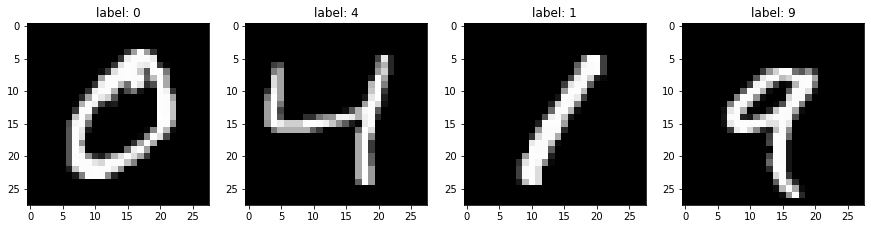

In [ ]:
from matplotlib import pyplot as plt

fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 1

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    ax.title.set_text('label: {}'.format(y_train[i]))
    plt.imshow(x_train[i], cmap='gray')
plt.show()


# **Pre-processing**

In [ ]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

print(x_train.shape)
print(x_test.shape)

(10000, 28, 28, 1)
(3000, 28, 28, 1)


**Using Sklearn**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
y_train = y_train.reshape(-1, 1)
y_train = encoder.fit_transform(y_train)

y_test = y_test.reshape(-1, 1)
y_test = encoder.fit_transform(y_test)

**Using Keras**

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# **The Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()
model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(8, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0508 - accuracy: 0.9879 - val_loss: 0.5130 - val_accuracy: 0.9313
Epoch 2/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0266 - accuracy: 0.9918 - val_loss: 0.5112 - val_accuracy: 0.9320
Epoch 3/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0138 - accuracy: 0.9958 - val_loss: 0.4676 - val_accuracy: 0.9487
Epoch 4/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0134 - accuracy: 0.9960 - val_loss: 0.5902 - val_accuracy: 0.9363
Epoch 5/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0103 - accuracy: 0.9964 - val_loss: 0.6101 - val_accuracy: 0.9437
Epoch 6/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0111 - accuracy: 0.9973 - val_loss: 0.6789 - val_accuracy: 0.9270
Epoch 7/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0136 - accuracy: 0.9963 - val_loss: 0.5627 - val_accuracy: 0.9430
Epoch 

**PLOT**

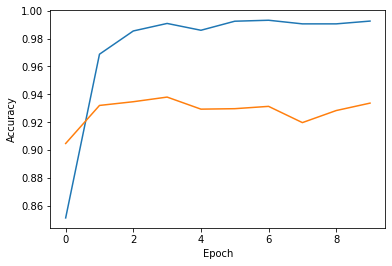

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

# **Prediction**

[[1.3134041e-35 9.6667505e-37 2.0404869e-22 1.3744224e-18 0.0000000e+00
  7.7984221e-36 0.0000000e+00 1.0000000e+00 2.0542512e-19 4.9599704e-20]
 [1.0171525e-09 1.6049381e-19 1.0000000e+00 5.3275393e-23 1.4655351e-24
  5.7724496e-32 6.5333600e-10 2.9348320e-27 1.9600466e-18 3.0677906e-35]
 [8.5166705e-29 1.0000000e+00 3.0584352e-25 4.7909353e-32 7.4711761e-20
  3.5425176e-18 8.1344627e-18 1.0525305e-22 9.6783192e-18 3.4502791e-18]]


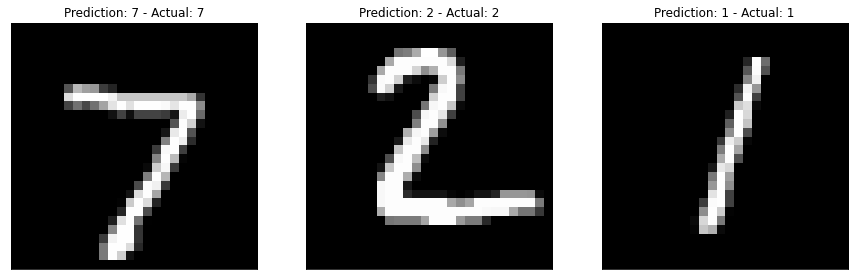

In [ ]:
prediction = model.predict(x_test[:3])
print(prediction)
import numpy as np

w=60
h=40
fig=plt.figure(figsize=(15, 15))
columns = 3
rows = 1
for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)

    plt.xticks([], [])
    plt.yticks([], [])
    actual_label = np.argmax(y_test[i-1])
    prediction_label = np.argmax(prediction[i-1])
    ax.title.set_text('Prediction: {} - Actual: {}'.format(prediction_label, actual_label))
    image = x_test[i-1].reshape((28,28))
    plt.imshow(image, cmap='gray')
plt.show()


Retrieval

In [ ]:
import os
import numpy as np
x_testi = np.expand_dims(x_testi, axis = 0)

feats = []
names = []
print(x_train[1].shape)
for image_index in range(len(x_train)):
    data = np.expand_dims(x_train[image_index], axis = 0)
    norm_feat = model.predict(data)
    feats.append(norm_feat)
    names.append(image_index)


(28, 28, 1)


In [ ]:
feats = np.array(feats)
import h5py
output = 'out.h5'
h5f = h5py.File(output, 'w')
h5f.create_dataset('feats', data = feats)
h5f.create_dataset('names', data = np.string_(names))
h5f.close()


In [ ]:

print(feats.shape)
feats = feats.reshape(-1)
x_testi = x_test[500]
y_testi = y_test[500]
x_testi = np.expand_dims(x_testi, axis = 0)
# extract query image's feature, compute simlarity score and sort
queryVec = model.predict(x_testi)
scores = np.dot(queryVec, feats.T)
print(np.array(scores).shape)
rank_ID = np.argsort(scores)[::-1]
rank_score = scores[rank_ID]
#print rank_ID
#print rank_score

(100000,)


ValueError: ignored

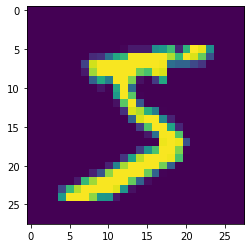

3


In [ ]:
plt.imshow(x_train[0].reshape(28,28))
plt.show()
print(np.argmax(queryVec))

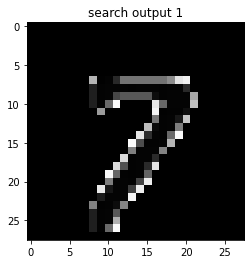

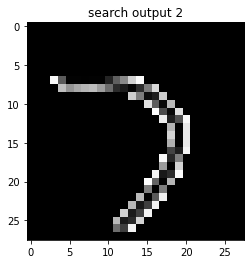

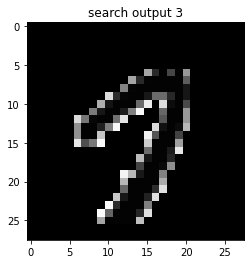

In [ ]:
def euclidean(a, b):
	# compute and return the euclidean distance between two vectors
	return np.linalg.norm(a - b)

def perform_search(queryFeatures, feats, maxResults=3):
	# initialize our list of results
	results = []
	# loop over our index
	for i in range(0, len(feats)):
		# compute the euclidean distance between our query features
		# and the features for the current image in our index, then
		# update our results list with a 2-tuple consisting of the
		# computed distance and the index of the image
		d = euclidean(queryFeatures, feats[i])
		results.append((d, i))
	# sort the results and grab the top ones
	results = sorted(results)[:maxResults]
	# return the list of results
	return results

index = 0
x_testi = x_test[index]
y_testi = y_test[index]
x_testi = np.expand_dims(x_testi, axis = 0)
queryVec = model.predict(x_testi)
results = perform_search(queryVec, feats)

images = []
# loop over the results
for (d, j) in results:
  # grab the result image, convert it back to the range
  # [0, 255], and then update the images list
  image = (x_train[j] * 255).astype("uint8")
  image = np.dstack([image] * 3)
  images.append(image)
# display the query image
query = (x_test[i] * 255).astype("uint8")

for i in range(len(images)):
    plt.title("search output %d" %(i+1))
    plt.imshow(images[i])
    plt.show()

(10000, 28, 28, 1)


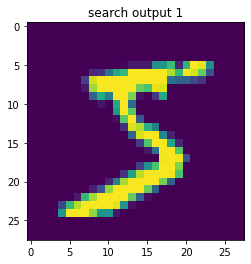

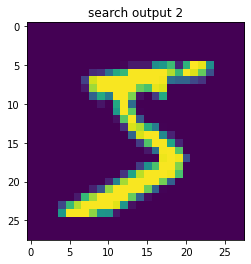

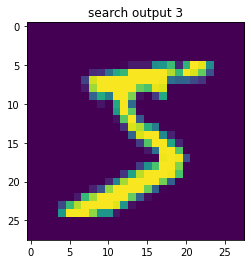

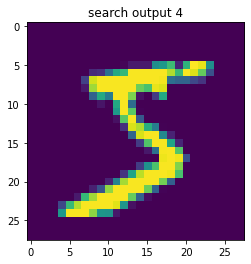

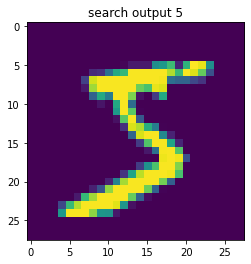

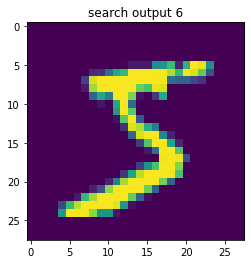

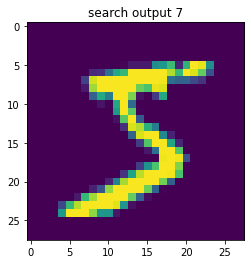

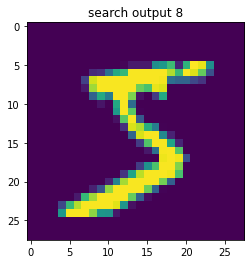

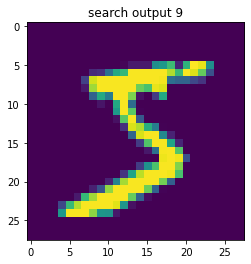

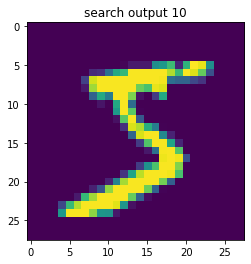

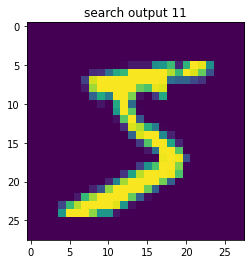

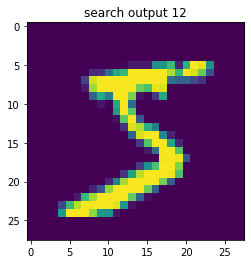

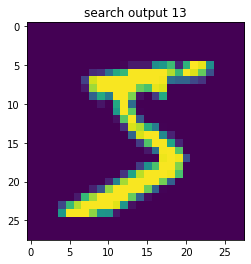

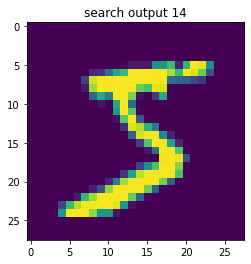

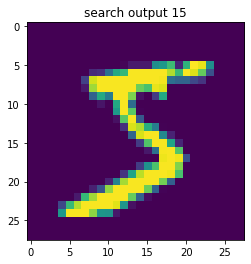

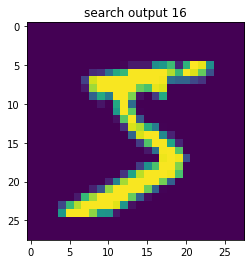

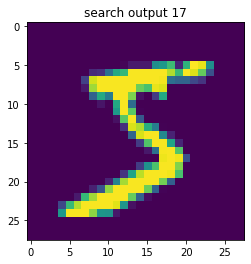

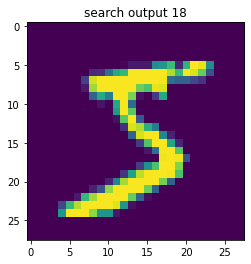

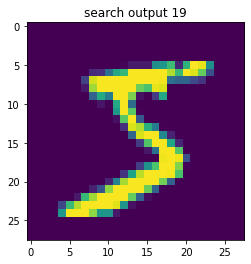

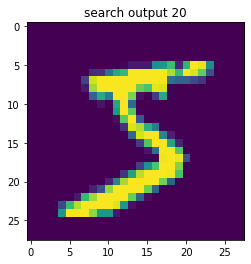

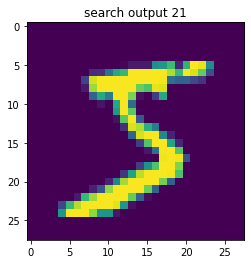

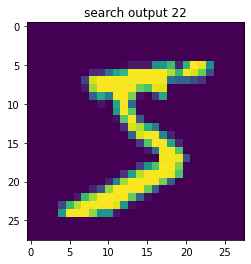

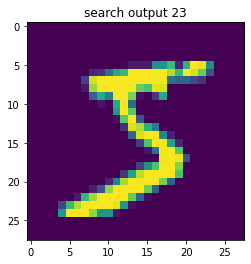

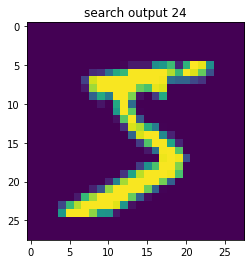

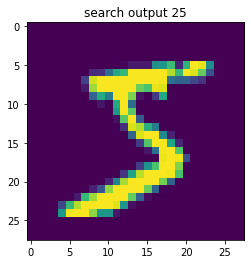

KeyboardInterrupt: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
# number of top retrieved images to show
maxres = 3
print(enumerate(rank_ID[0:maxres]))
imlist = [x_train[index] for i,index in enumerate(rank_ID[0:maxres])]
# print("top %d images in order are: " %maxres, imlist)
data = np.array(imlist).reshape(10000,28,28)
print(np.array(imlist).reshape(10000,28,28,1).shape)
# show top #maxres retrieved result one by one
for i in range(len(data)):
    plt.title("search output %d" %(i+1))
    plt.imshow(data[i])
    plt.show()